![image](https://docs.google.com/uc?export=download&id=1Nh6vjig-ADM1RMbaHrj_GItD3O1ZW4Vr)
# Análisis con Machine Learning - MINE4206

# **Laboratorio Final - Despliegue de Modelos**
## **Objetivos**
- Aprender a usar Flask como alternativa de despliegue sencilla
- Aprender a utilizar AWS SageMaker y MLFlow como alternativa de despliegue avanzada.

## **Importando las librerías requeridas para el laboratorio**

In [1]:
!shred -u setup_colab_general.py
!wget -q "https://github.com/jpcano1/python_utils/raw/main/setup_colab_general.py" -O setup_colab_general.py
import setup_colab_general as setup_general
setup_general.setup_general()

shred: setup_colab_general.py: failed to open for writing: No such file or directory


  0%|          | 0/3 [00:00<?, ?KB/s]

General Functions Enabled Successfully


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")
import seaborn as sns

from utils import general as gen

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    f1_score, roc_auc_score, plot_roc_curve, 
    recall_score, precision_score, 
    accuracy_score, confusion_matrix,
    classification_report
)

import mlflow

In [3]:
data_id = "1FmgtiLqKpUE_glH7aSXpMDnjsuUWe_9Y"

In [4]:
gen.download_file_from_google_drive(data_id, "spam.csv", size=504)

  0%|          | 0/504 [00:00<?, ?KB/s]

In [5]:
data = pd.read_csv("data/spam.csv", encoding="latin-1")

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [8]:
data.rename(columns={'v1':'label',
                     'v2':'message'}, inplace = True)

In [9]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data["label"] = data["label"].apply(lambda x: 0 if x == "ham" else 1)

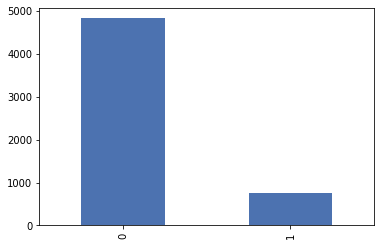

In [11]:
data['label'].value_counts().plot(kind='bar')
plt.show()

## **Análisis y procesamiento**

In [12]:
label = data["label"]
text_data = data["message"]

In [13]:
pipeline = Pipeline([
    ("vectorizer", CountVectorizer(analyzer="word")),
    ("transformer", TfidfTransformer(use_idf=False))
])

In [14]:
text_data = pipeline.fit_transform(text_data)

In [15]:
text_data = pd.DataFrame(text_data.toarray(), 
                         columns=pipeline.steps[0][1].get_feature_names())

In [16]:
text_data.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X = text_data.values
y = label.values

In [18]:
splitter = StratifiedShuffleSplit(random_state=1234, test_size=0.2)

In [19]:
for full_train_index, test_index in splitter.split(X, y):
    pass

full_X_train, full_y_train = X[full_train_index], y[full_train_index]
X_test, y_test = X[test_index], y[test_index]

In [20]:
for train_index, val_index in splitter.split(full_X_train, full_y_train):
    pass

X_train, y_train = full_X_train[train_index], full_y_train[train_index]
X_val, y_val = full_X_train[val_index], full_y_train[val_index]

In [21]:
X_test_df = text_data.iloc[test_index]
y_test_df = label.iloc[test_index]

X_test_df.to_csv("data/X_test.csv.gz", index=False, compression="gzip")
y_test_df.to_csv("data/y_test.csv.gz", index=False, compression="gzip")

## **Entrenamiento y Validación con MLFlow**
- Aquí vamos a utilizar el logging de MLFlow para visualizar sobre el dashboard

In [22]:
def train(sk_model, X_train, y_train):
    sk_model = sk_model.fit(X_train, y_train)

    train_acc = sk_model.score(X_train, y_train)
    # Esta línea nos va a permitir ver las métricas dentro del 
    # dashboard de MLFlow
    mlflow.log_metric("train_acc", train_acc)
    print(f"Train Accuracy: {train_acc:.3%}")

In [23]:
def evaluate(sk_model, X_test, y_test):
    eval_acc = sk_model.score(X_test, y_test)

    y_pred = sk_model.predict(X_test)
    auc_score = roc_auc_score(y_test, y_pred)
    eval_recall = recall_score(y_test, y_pred)
    eval_precision = precision_score(y_test, y_pred)

    mlflow.log_metric("eval_acc", eval_acc)
    mlflow.log_metric("auc_score", auc_score)

    print(f"Auc Score: {auc_score:.3%}")
    print(f"Eval Accuracy: {eval_acc:.3%}")
    print(f"Eval Recall: {eval_recall: .3%}")
    print(f"Eval Precision: {eval_precision: .3%}")

    roc_plot = plot_roc_curve(
        sk_model, X_test, 
        y_test, name="Scikit-Learn ROC Curve"
    )
    plt.savefig("sklearn_roc_plot.png")
    plt.show()
    plt.clf()

    conf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(conf_matrix, annot=True, fmt="g")
    ax.invert_xaxis()
    ax.invert_yaxis()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("Confusion Matrix")
    plt.savefig("sklearn_conf_matrix.png")
    mlflow.log_artifact("sklearn_roc_plot.png")
    mlflow.log_artifact("sklearn_conf_matrix.png")

In [24]:
log_reg = LogisticRegression(
    random_state=1234, max_iter=400, solver="newton-cg"
)

INFO: 'Scikit Learn Experiment' does not exist. Creating a new experiment
Train Accuracy: 97.363%
Auc Score: 87.093%
Eval Accuracy: 96.323%
Eval Recall:  74.497%
Eval Precision:  97.368%


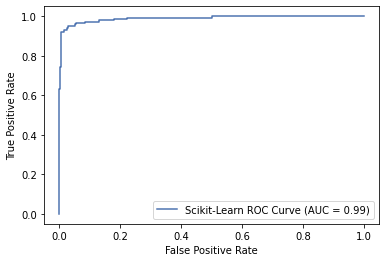

Model Run:  cb6f594451d645308b0cb7d180a869fb


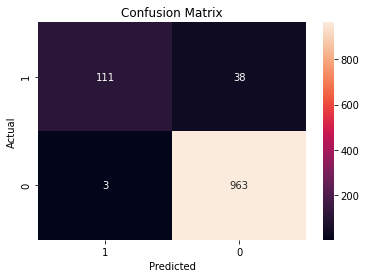

In [25]:
mlflow.set_experiment("Scikit Learn Experiment")
with mlflow.start_run():
    train(log_reg, X_train, y_train)
    evaluate(log_reg, X_test, y_test)
    # Creamos el modelo en el Dashboard y lo salvamos
    mlflow.sklearn.log_model(log_reg, "Log Reg Model")
    print("Model Run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

In [26]:
!ls mlruns/1

cb6f594451d645308b0cb7d180a869fb  meta.yaml


In [27]:
# Cargamos el modelo y hacemos predicciones
model = mlflow.sklearn.load_model("runs:/cb6f594451d645308b0cb7d180a869fb/Log Reg Model")

In [28]:
y_pred = model.predict(X_val)

In [29]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       772
           1       0.98      0.75      0.85       120

    accuracy                           0.96       892
   macro avg       0.97      0.87      0.91       892
weighted avg       0.96      0.96      0.96       892



In [30]:
recall_score(y_val, y_pred)

0.75

In [31]:
precision_score(y_val, y_pred)

0.9782608695652174

In [32]:
f1_score(y_val, y_pred)

0.849056603773585

In [33]:
accuracy_score(y_val, y_pred)

0.9641255605381166

In [34]:
tree_clf = DecisionTreeClassifier(random_state=1234)

- Ahora que ya entrenamos y validamos, procedemos a visualizar los resultados de entrenamiento con el comando `mlflow ui -p 5000`

Train Accuracy: 100.000%
Auc Score: 89.285%
Eval Accuracy: 95.695%
Eval Recall:  80.537%
Eval Precision:  86.331%


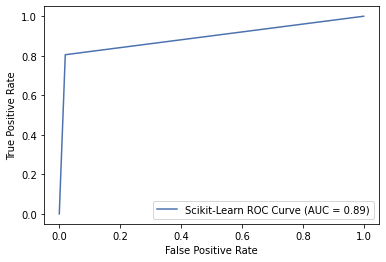

Model Run:  64550a3f32fe48ebbbc0e5bd6443ab03


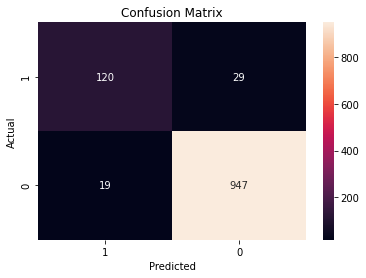

In [35]:
with mlflow.start_run():
    train(tree_clf, X_train, y_train)
    evaluate(tree_clf, X_test, y_test)
    mlflow.sklearn.log_model(tree_clf, "Decision Tree Model")
    print("Model Run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

In [36]:
!ls mlruns/1

64550a3f32fe48ebbbc0e5bd6443ab03  cb6f594451d645308b0cb7d180a869fb  meta.yaml


In [37]:
model = mlflow.sklearn.load_model("runs:/64550a3f32fe48ebbbc0e5bd6443ab03/Decision Tree Model")

In [38]:
y_pred = model.predict(X_val)

In [39]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       772
           1       0.90      0.82      0.86       120

    accuracy                           0.96       892
   macro avg       0.94      0.90      0.92       892
weighted avg       0.96      0.96      0.96       892



In [40]:
recall_score(y_val, y_pred)

0.8166666666666667

In [41]:
precision_score(y_val, y_pred)

0.8990825688073395

In [42]:
f1_score(y_val, y_pred)

0.8558951965065502

In [43]:
accuracy_score(y_val, y_pred)

0.9630044843049327